In [5]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [8]:
data=pd.read_csv(r'E:\Innomatics\EDA PROJECT\final_reordered.csv')

In [9]:
df=data.copy()

In [10]:
df.head()

,areas,state,lat,long,temperature,humdity,wind_speed,pressure,AQI,pm2.5,pm10,co,so2,no2,o3
0,Visakhapatnam,andhra_pradesh,17.6868,83.2185,23.0,68.0,10.0,1013.0,203,91,164,1147,6,11,7
1,Vijayawada,andhra_pradesh,16.5062,80.6480,23.0,73.0,4.0,1013.0,102,48,104,490,4,6,8
2,Guntur,andhra_pradesh,16.3067,80.4365,22.0,65.0,4.0,1013.0,104,43,106,427,4,9,8
3,Nellore,andhra_pradesh,14.4426,79.9865,24.0,84.0,10.0,1012.0,98,48,98,399,5,8,8
4,Kurnool,andhra_pradesh,15.8281,78.0369,22.0,80.0,8.0,1013.0,94,34,94,443,4,9,9


In [11]:
df['state'].nunique()

25

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   areas        685 non-null    object 
 1   state        685 non-null    object 
 2   lat          685 non-null    float64
 3   long         685 non-null    float64
 4   temperature  670 non-null    float64
 5   humdity      671 non-null    float64
 6   wind_speed   671 non-null    float64
 7   pressure     671 non-null    float64
 8   AQI          685 non-null    int64  
 9   pm2.5        685 non-null    int64  
 10  pm10         685 non-null    int64  
 11  co           685 non-null    int64  
 12  so2          685 non-null    int64  
 13  no2          685 non-null    int64  
 14  o3           685 non-null    int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 80.4+ KB


###### assigning suitable datatypes

In [13]:
df

,areas,state,lat,long,temperature,humdity,wind_speed,pressure,AQI,pm2.5,pm10,co,so2,no2,o3
0,Visakhapatnam,andhra_pradesh,17.6868,83.2185,23.0,68.0,10.0,1013.0,203,91,164,1147,6,11,7
1,Vijayawada,andhra_pradesh,16.5062,80.6480,23.0,73.0,4.0,1013.0,102,48,104,490,4,6,8
2,Guntur,andhra_pradesh,16.3067,80.4365,22.0,65.0,4.0,1013.0,104,43,106,427,4,9,8
3,Nellore,andhra_pradesh,14.4426,79.9865,24.0,84.0,10.0,1012.0,98,48,98,399,5,8,8
4,Kurnool,andhra_pradesh,15.8281,78.0369,22.0,80.0,8.0,1013.0,94,34,94,443,4,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,Reiek,mizoram,23.6514,92.6243,25.0,20.0,4.0,1012.0,46,27,31,250,2,4,5
681,Bairabi,mizoram,24.2221,92.6291,27.0,33.0,4.0,1013.0,46,27,31,250,2,4,5
682,Mamit,mizoram,23.9316,92.4921,29.0,20.0,4.0,1012.0,46,27,31,250,2,4,5
683,Vairengte,mizoram,24.0072,92.5616,29.0,20.0,4.0,1012.0,46,27,31,250,2,4,5


In [7]:
df.astype({})

,areas,state,lat,long,temperature,humdity,wind_speed,pressure,AQI,pm2.5,pm10,co,so2,no2,o3
0,Visakhapatnam,andhra_pradesh,17.6868,83.2185,23.0,68.0,10.0,1013.0,203,91,164,1147,6,11,7
1,Vijayawada,andhra_pradesh,16.5062,80.6480,23.0,73.0,4.0,1013.0,102,48,104,490,4,6,8
2,Guntur,andhra_pradesh,16.3067,80.4365,22.0,65.0,4.0,1013.0,104,43,106,427,4,9,8
3,Nellore,andhra_pradesh,14.4426,79.9865,24.0,84.0,10.0,1012.0,98,48,98,399,5,8,8
4,Kurnool,andhra_pradesh,15.8281,78.0369,22.0,80.0,8.0,1013.0,94,34,94,443,4,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,Reiek,mizoram,23.6514,92.6243,25.0,20.0,4.0,1012.0,46,27,31,250,2,4,5
681,Bairabi,mizoram,24.2221,92.6291,27.0,33.0,4.0,1013.0,46,27,31,250,2,4,5
682,Mamit,mizoram,23.9316,92.4921,29.0,20.0,4.0,1012.0,46,27,31,250,2,4,5
683,Vairengte,mizoram,24.0072,92.5616,29.0,20.0,4.0,1012.0,46,27,31,250,2,4,5


### Cleaning

##### Dropping the first entry because another entry is updated according to the present time.

In [14]:
df.drop_duplicates(subset='areas',keep='last',inplace=True)

###### removing null values if the they are more than 70% based on the row percent

In [34]:
df.dropna(thresh=13,axis=0)

,areas,state,lat,long,temperature,humdity,wind_speed,pressure,AQI,pm2.5,pm10,co,so2,no2,o3
0,Visakhapatnam,andhra_pradesh,17.6868,83.2185,23.0,68.0,10.0,1013.0,203,91,164,1147,6,11,7
1,Vijayawada,andhra_pradesh,16.5062,80.6480,23.0,73.0,4.0,1013.0,102,48,104,490,4,6,8
2,Guntur,andhra_pradesh,16.3067,80.4365,22.0,65.0,4.0,1013.0,104,43,106,427,4,9,8
3,Nellore,andhra_pradesh,14.4426,79.9865,24.0,84.0,10.0,1012.0,98,48,98,399,5,8,8
4,Kurnool,andhra_pradesh,15.8281,78.0369,22.0,80.0,8.0,1013.0,94,34,94,443,4,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,Reiek,mizoram,23.6514,92.6243,25.0,20.0,4.0,1012.0,46,27,31,250,2,4,5
681,Bairabi,mizoram,24.2221,92.6291,27.0,33.0,4.0,1013.0,46,27,31,250,2,4,5
682,Mamit,mizoram,23.9316,92.4921,29.0,20.0,4.0,1012.0,46,27,31,250,2,4,5
683,Vairengte,mizoram,24.0072,92.5616,29.0,20.0,4.0,1012.0,46,27,31,250,2,4,5


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, 0 to 684
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   areas        682 non-null    object 
 1   state        682 non-null    object 
 2   lat          682 non-null    float64
 3   long         682 non-null    float64
 4   temperature  682 non-null    float64
 5   humdity      668 non-null    float64
 6   wind_speed   668 non-null    float64
 7   pressure     668 non-null    float64
 8   AQI          682 non-null    int64  
 9   pm2.5        682 non-null    int64  
 10  pm10         682 non-null    int64  
 11  co           682 non-null    int64  
 12  so2          682 non-null    int64  
 13  no2          682 non-null    int64  
 14  o3           682 non-null    int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 85.2+ KB


###### Filling the null values

In [20]:
df['temperature'].fillna(value=df['temperature'].median(),inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, 0 to 684
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   areas        682 non-null    object 
 1   state        682 non-null    object 
 2   lat          682 non-null    float64
 3   long         682 non-null    float64
 4   temperature  682 non-null    float64
 5   humdity      668 non-null    float64
 6   wind_speed   668 non-null    float64
 7   pressure     668 non-null    float64
 8   AQI          682 non-null    int64  
 9   pm2.5        682 non-null    int64  
 10  pm10         682 non-null    int64  
 11  co           682 non-null    int64  
 12  so2          682 non-null    int64  
 13  no2          682 non-null    int64  
 14  o3           682 non-null    int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 85.2+ KB


In [ ]:
df=df.astype({'temperature':np.float16, 'humdity':np.float16, 'wind_speed':np.float16, 'pressure':np.float16,
       'AQI':np.int8, 'pm2.5':np.int8, 'pm10':np.int8, 'co':np.int16, 'so2':np.int8, 'no2':np.int8, 'o3':np.int8,'Total_Pollution':np.int8,})

In [19]:
df

,areas,state,lat,long,temperature,humdity,wind_speed,pressure,AQI,pm2.5,pm10,co,so2,no2,o3
0,Visakhapatnam,andhra_pradesh,17.6868,83.2185,23.0,68.0,10.0,1013.0,203,91,164,1147,6,11,7
1,Vijayawada,andhra_pradesh,16.5062,80.6480,23.0,73.0,4.0,1013.0,102,48,104,490,4,6,8
2,Guntur,andhra_pradesh,16.3067,80.4365,22.0,65.0,4.0,1013.0,104,43,106,427,4,9,8
3,Nellore,andhra_pradesh,14.4426,79.9865,24.0,84.0,10.0,1012.0,98,48,98,399,5,8,8
4,Kurnool,andhra_pradesh,15.8281,78.0369,22.0,80.0,8.0,1013.0,94,34,94,443,4,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,Reiek,mizoram,23.6514,92.6243,25.0,20.0,4.0,1012.0,46,27,31,250,2,4,5
681,Bairabi,mizoram,24.2221,92.6291,27.0,33.0,4.0,1013.0,46,27,31,250,2,4,5
682,Mamit,mizoram,23.9316,92.4921,29.0,20.0,4.0,1012.0,46,27,31,250,2,4,5
683,Vairengte,mizoram,24.0072,92.5616,29.0,20.0,4.0,1012.0,46,27,31,250,2,4,5


## Outlier detection

In [14]:
def outliers(data,col):
        Q1=np.quantile(df[col],0.25)
        Q3=np.quantile(df[col],0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        if len(df[col][(df[col]<lower_bound)|(df[col]>upper_bound)]) == 0:
            print(f'Outliers not Found in {col}')
        else:
            print(f'Total number of outliers in {col}:',df[col][(df[col]<lower_bound)|(df[col]>upper_bound)].count())
            

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 684
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   areas        668 non-null    object 
 1   state        668 non-null    object 
 2   temperature  668 non-null    float64
 3   humdity      668 non-null    float64
 4   wind_speed   668 non-null    float64
 5   pressure     668 non-null    float64
 6   AQI          668 non-null    int64  
 7   pm2.5        668 non-null    int64  
 8   pm10         668 non-null    int64  
 9   co           668 non-null    int64  
 10  so2          668 non-null    int64  
 11  no2          668 non-null    int64  
 12  o3           668 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 73.1+ KB


In [16]:
outliers(df,'humdity')
outliers(df,'pressure')
outliers(df,'temperature')
outliers(df,'wind_speed')
outliers(df,'pm2.5')
outliers(df,'pm10')
outliers(df,'co')
outliers(df,'so2')
outliers(df,'no2')
outliers(df,'o3')

Outliers not Found in humdity
Total number of outliers in pressure: 17
Outliers not Found in temperature
Outliers not Found in wind_speed
Total number of outliers in pm2.5: 33
Total number of outliers in pm10: 22
Total number of outliers in co: 26
Total number of outliers in so2: 29
Total number of outliers in no2: 60
Total number of outliers in o3: 12


##### Here we can see there are outlier  but we cant remove it so we have to handle the outliers because the values are the real observation

### Creating a air quality categories`

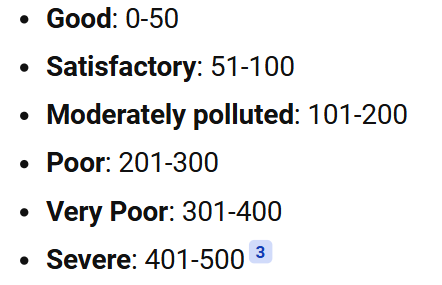

## categorising the air quality

In [20]:
def airq(x):
    if x<51:
        return 'good' 
    elif x<101:
        return 'satisfactory'
    elif x<201:
        return 'moderately polluted'
    elif x<301:
        return 'poor'
    elif x<401:
        return 'very poor'
    elif x<501:
        return 'severe'
df['Air quality']=df['AQI'].apply(airq)

### calculation the total pollution 

In [22]:
df['Total_Pollution'] = df['pm2.5'] + df['pm10'] + df['co'] + df['so2'] + df['no2'] + df['o3']
# Define a function to categorize Total_Pollution levels
def pollution_category(total_pollution):
    if total_pollution <= 150:
        return "Safe"
    elif total_pollution <= 300:
        return "Considerable"
    elif total_pollution <= 600:
        return "Unsafe"
    elif total_pollution <= 1000:
        return "Hazardous"
    else:
        return "Extremely Hazardous"

# Apply the function to create a new category column
df['Pollution_Category'] = df['Total_Pollution'].apply(pollution_category)


## Creaeting a weather conditions category

In [23]:
def weather_conditions(row):
    if row['temperature'] > 25 and row['humdity'] > 70:
        return "Hot & Humid"
    elif row['temperature'] < 15 and row['humdity'] < 40:
        return "Cool & Dry"
    else:
        return "Normal"

df['Weather_Condition'] = df.apply(weather_conditions, axis=1)

In [24]:
#df.to_csv('feature_extracted.csv',index=False)

In [27]:
df

,areas,state,temperature,humdity,wind_speed,pressure,AQI,pm2.5,pm10,co,so2,no2,o3,Air quality,Total_Pollution,Pollution_Category,Weather_Condition
0,Visakhapatnam,andhra_pradesh,23.0,68.0,10.0,1013.0,203,91,164,1147,6,11,7,poor,1426,Extremely Hazardous,Normal
1,Vijayawada,andhra_pradesh,23.0,73.0,4.0,1013.0,102,48,104,490,4,6,8,moderately polluted,660,Hazardous,Normal
2,Guntur,andhra_pradesh,22.0,65.0,4.0,1013.0,104,43,106,427,4,9,8,moderately polluted,597,Unsafe,Normal
3,Nellore,andhra_pradesh,24.0,84.0,10.0,1012.0,98,48,98,399,5,8,8,satisfactory,566,Unsafe,Normal
4,Kurnool,andhra_pradesh,22.0,80.0,8.0,1013.0,94,34,94,443,4,9,9,satisfactory,593,Unsafe,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,Reiek,mizoram,25.0,20.0,4.0,1012.0,46,27,31,250,2,4,5,good,319,Unsafe,Normal
681,Bairabi,mizoram,27.0,33.0,4.0,1013.0,46,27,31,250,2,4,5,good,319,Unsafe,Normal
682,Mamit,mizoram,29.0,20.0,4.0,1012.0,46,27,31,250,2,4,5,good,319,Unsafe,Normal
683,Vairengte,mizoram,29.0,20.0,4.0,1012.0,46,27,31,250,2,4,5,good,319,Unsafe,Normal


In [28]:
#df.to_csv('feature_extracted.csv',index=False)

In [29]:
data

,areas,state,lat,long,temperature,humdity,wind_speed,pressure,AQI,pm2.5,pm10,co,so2,no2,o3
0,Visakhapatnam,andhra_pradesh,17.6868,83.2185,23.0,68.0,10.0,1013.0,203,91,164,1147,6,11,7
1,Vijayawada,andhra_pradesh,16.5062,80.6480,23.0,73.0,4.0,1013.0,102,48,104,490,4,6,8
2,Guntur,andhra_pradesh,16.3067,80.4365,22.0,65.0,4.0,1013.0,104,43,106,427,4,9,8
3,Nellore,andhra_pradesh,14.4426,79.9865,24.0,84.0,10.0,1012.0,98,48,98,399,5,8,8
4,Kurnool,andhra_pradesh,15.8281,78.0369,22.0,80.0,8.0,1013.0,94,34,94,443,4,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,Reiek,mizoram,23.6514,92.6243,25.0,20.0,4.0,1012.0,46,27,31,250,2,4,5
681,Bairabi,mizoram,24.2221,92.6291,27.0,33.0,4.0,1013.0,46,27,31,250,2,4,5
682,Mamit,mizoram,23.9316,92.4921,29.0,20.0,4.0,1012.0,46,27,31,250,2,4,5
683,Vairengte,mizoram,24.0072,92.5616,29.0,20.0,4.0,1012.0,46,27,31,250,2,4,5


In [32]:
pd.crosstab(df['state'],df['Air quality'])

Air quality,good,moderately polluted,poor,satisfactory,very poor
state,,,,,
andhra_pradesh,1,17,3,17,0
arunachal_pradesh,0,0,0,30,0
assam,0,11,0,9,10
chhattisgarh,0,0,0,19,0
delhi,0,7,23,0,0
dnh_dd,0,10,0,5,0
goa,0,0,0,30,0
gujarat,0,9,0,11,0
haryana,0,16,2,9,0


In [63]:
df

,areas,state,temperature,humdity,wind_speed,pressure,AQI,pm2.5,pm10,co,so2,no2,o3,Total_Pollution,Weather_Condition,Air quality,Pollution_Category
0,Visakhapatnam,andhra_pradesh,23.0,68.0,10.0,1013.0,203,91,164,1147,6,11,7,1426,Normal,poor,Extremely Hazardous
1,Vijayawada,andhra_pradesh,23.0,73.0,4.0,1013.0,102,48,104,490,4,6,8,660,Normal,moderately polluted,Hazardous
2,Guntur,andhra_pradesh,22.0,65.0,4.0,1013.0,104,43,106,427,4,9,8,597,Normal,moderately polluted,Unsafe
3,Nellore,andhra_pradesh,24.0,84.0,10.0,1012.0,98,48,98,399,5,8,8,566,Normal,satisfactory,Unsafe
4,Kurnool,andhra_pradesh,22.0,80.0,8.0,1013.0,94,34,94,443,4,9,9,593,Normal,satisfactory,Unsafe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,Reiek,mizoram,25.0,20.0,4.0,1012.0,46,27,31,250,2,4,5,319,Normal,good,Unsafe
681,Bairabi,mizoram,27.0,33.0,4.0,1013.0,46,27,31,250,2,4,5,319,Normal,good,Unsafe
682,Mamit,mizoram,29.0,20.0,4.0,1012.0,46,27,31,250,2,4,5,319,Normal,good,Unsafe
683,Vairengte,mizoram,29.0,20.0,4.0,1012.0,46,27,31,250,2,4,5,319,Normal,good,Unsafe
